# Titanic: Machine Learning from Disaster

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

**Import libraries**

In [2]:
import pandas as pd
import pandas_profiling # library for automatic EDA
%pip install autoviz # installing and importing autoviz, another library for automatic data visualization
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
# data visualization
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

Note: you may need to restart the kernel to use updated packages.
Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


'C:\Users\Nathan' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


## Exploratory data analysis

In [3]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [4]:
print("Shape train data :",train.shape)
print("Shape test data :",test.shape)

Shape train data : (891, 12)
Shape test data : (418, 11)


In [5]:
def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)

In [6]:
df_all = concat_df(train,test)

In [7]:
df_all.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

In [8]:
df_all.shape

(1309, 12)

In [9]:
list(df_all.columns)

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket']

In [10]:
list(train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [11]:
list(test.columns)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### Info about our data
- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
- sibsp: The dataset defines family relations in this way…
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way…
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [12]:
# The pandas profiling library is really useful on helping us understand the data we're working on.
# It saves us some precious time on the EDA process.
report = pandas_profiling.ProfileReport(train)

In [13]:
# Let's now visualize the report generated by pandas_profiling.
display(report)

In [14]:
# Also, there is an option to generate an .HTML file containing all the information generated by the report.
# report.to_file(output_file='report.html')

Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 1.723


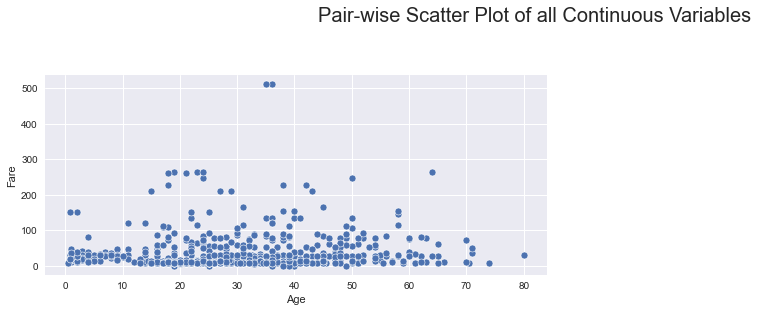

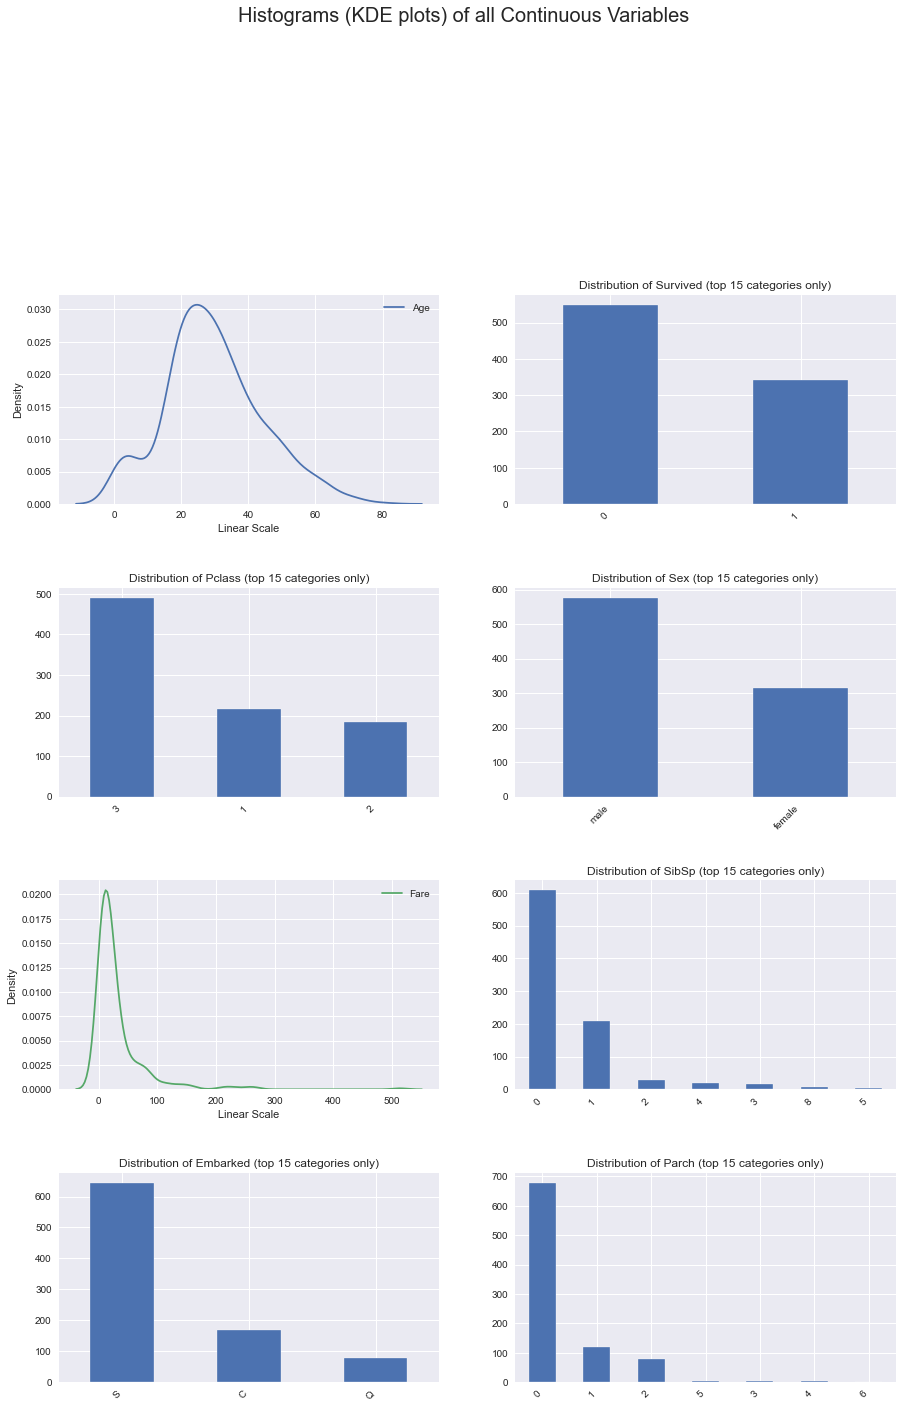

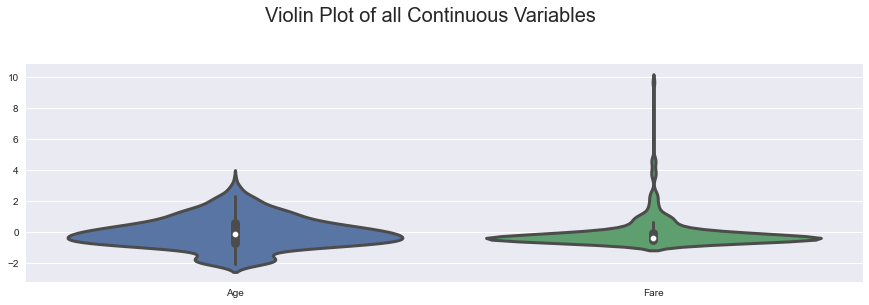

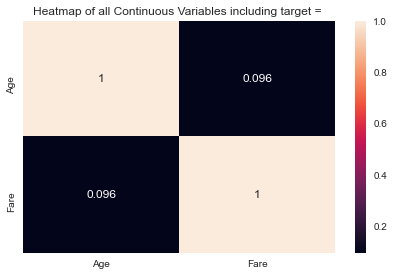

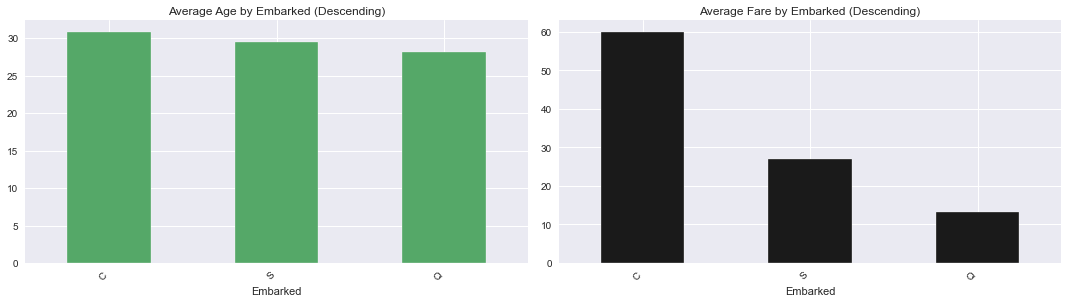

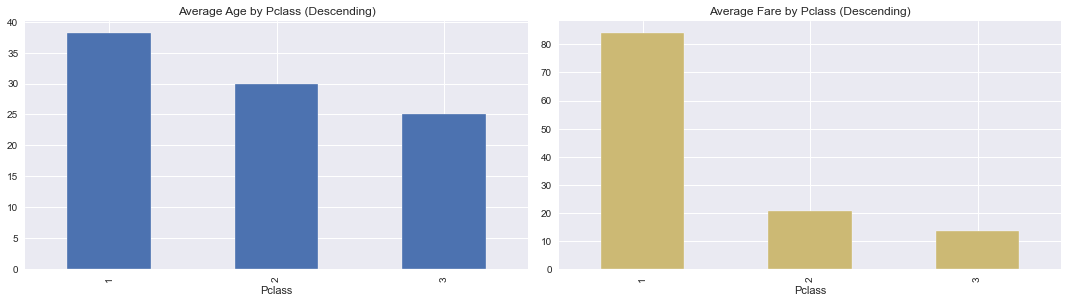

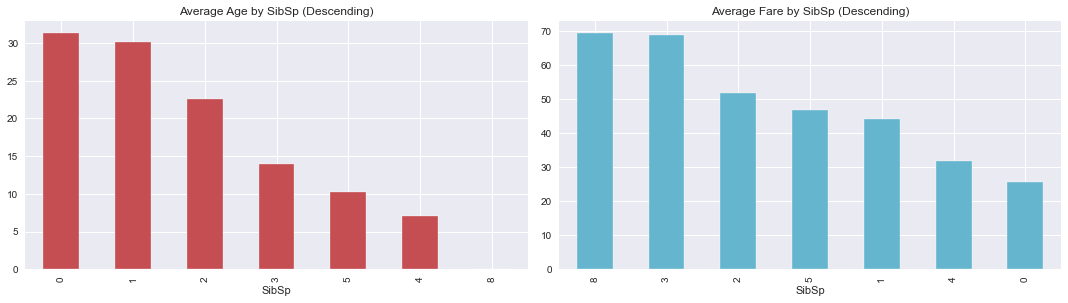

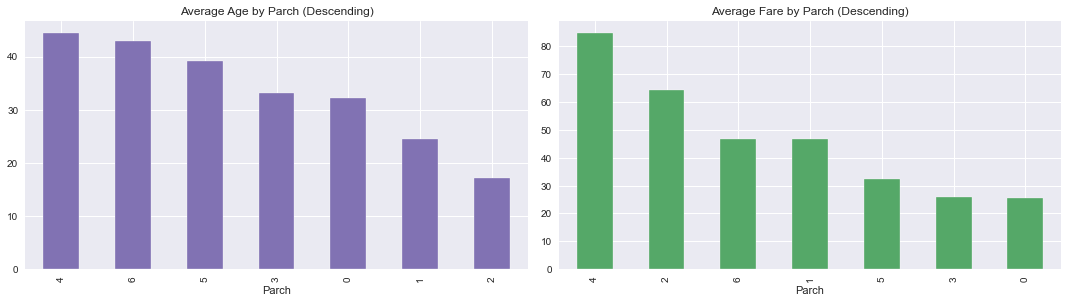

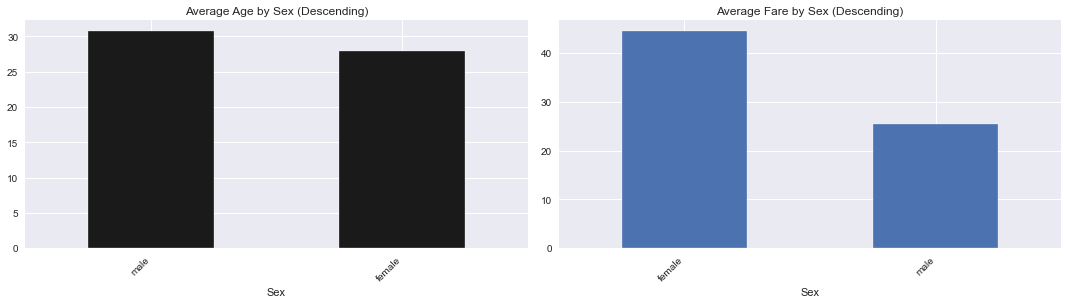

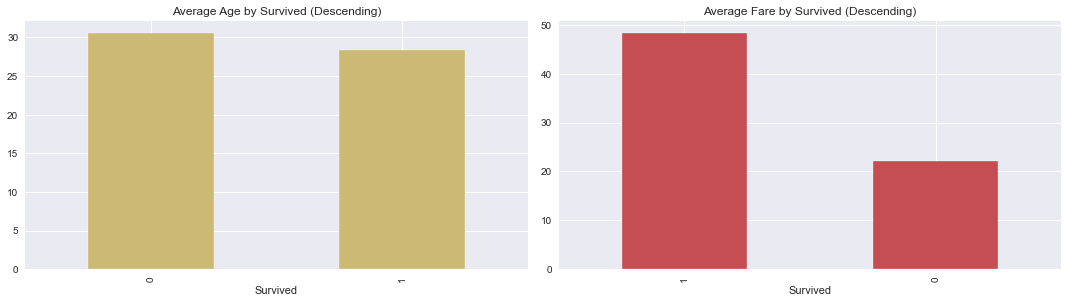

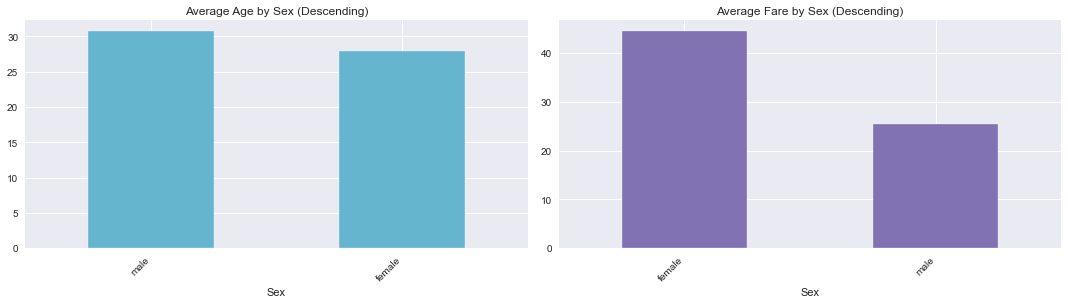

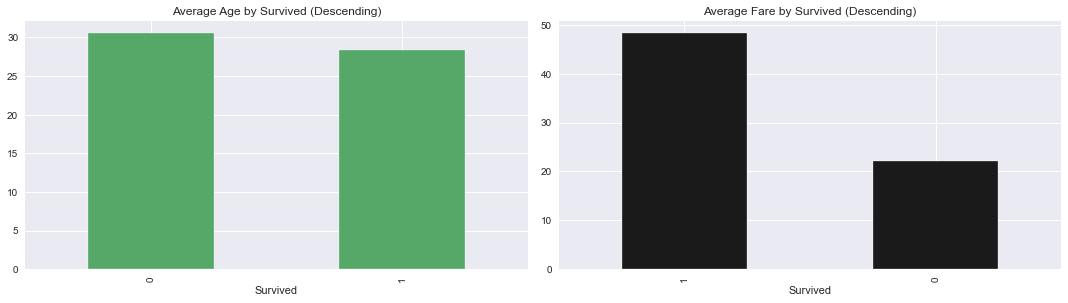

In [15]:
# Another great library for automatic EDA is AutoViz.
# With this library, several plots are generated with only 1 line of code.
# When combined with pandas_profiling, we obtain lots of information in a
# matter of seconds, using less then 5 lines of code.
AV = AutoViz_Class()

# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz("dataset/train.csv")

Using the power of both automatic EDA libraries listed above, we can observe each variable's behaviour individually, with plots that goes from Histograms to Boxplots, Correlation Matrix and much more. It speeds up time and minimizes the effort spent on the initial process of our work.

We can gather some really useful information from both reports. Let's now point some of them out:

- Our classes are not that much disbalanced. We have ~38% of the passengers into class "1" (survived) and ~62% of the passengers into class "0" (didn't survive).
- The "Pclass" column, that informs us about the passenger's ticket class, shows us that ~55% of them are on class 3, ~24% of them are on class 2 and ~21% on class 1.
- Most of the passengers into this dataset are male: ~35% of the passengers are female, and ~65% are male.
- Almost 20% of the values in the "Age" column are missing. We can fill out these nulls with various techniques, such as filling them with the distribution's mean. The ages distribution is a little bit skewed, with it's mean being around 30 years old, and it's standard deviation being close to 15. The oldest passenger we have in this dataset is 80 years old.
- According to the "SibSP" column, most of the passengers (~68%) didn't have any spouses or siblings aboard the ship. That is also applied when we check out the "Parch" column.
- The distribution of Fares is much more skewed. It's mean value is around 32, with it's standard deviation being close to 50. It's minimum value is 0, and it's maximum value is 512.3292. That means that we're going to have to deal with this column carefully if we plan to use models such as SVMs.
When ckecking the "Embarked" column, it shows us that 72.3% of the passengers embarked at Southampton port, 18.9% of the passengers at Cherbourg port and 8.6% of the passengers at Queenstown port.
- "Fare" values are higher for passengers with "Pclass" = 1, lower for passengers with "Pclass" = 2 and even lower for passengers with "Pclass" = 3. Logically, it looks like the classification of "Pclass" is defined by the value of the passenger's fare.

### Data cleaning

In [16]:
print("Missings in the train data : ")
display(train.isnull().sum())
print("=============================")
print("Missings in the test data : ")
display(test.isnull().sum())

Missings in the train data : 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missings in the test data : 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

**Age**

In [18]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

Create the cut_points and label_names lists to split the Age column into six categories:

- Missing, from -1 to 0
- Infant, from 0 to 5
- Teenager, from 12 to 18
- nager, from 12 to 18
- Young Adult, from 18 to 35
- Adult, from 35 to 60
- Senior from from 60 to 100

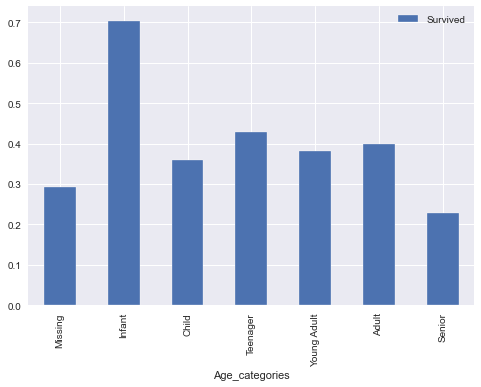

In [19]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

### Let's analyse the different unique values

In [20]:
list(train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_categories']

**Pclass**

In [21]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [22]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

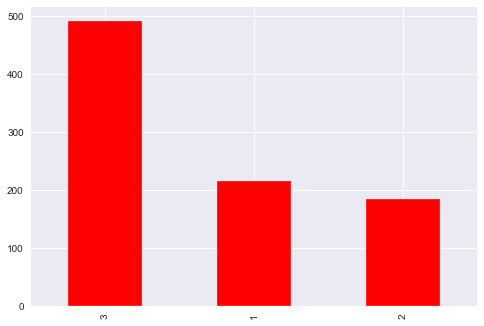

In [23]:
train.Pclass.value_counts().plot(kind='bar',color='red')

**Sexe**

In [24]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

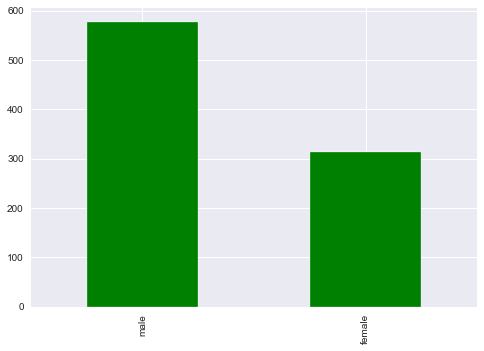

In [25]:
train.Sex.value_counts().plot(kind='bar',color='green')

In [26]:
column_name = "Pclass"
df = train
dummies = pd.get_dummies(df[column_name],prefix=column_name,drop_first=True)
dummies.head()

Pclass_2  Pclass_3
0         0         1
1         0         0
2         0         1
3         0         0
4         0         1

In [27]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_categories  Pclass_1  \
0      0         A/5 21171   7.2500   NaN        S    Young Adult         0   
1      0          PC 17599  71.2833   C85        C          Adult         1   
2      0  STON/O2. 3101282   7.9250   NaN        S    Young Adult         0   
3      0            113803  53.1000  C123        S    Young Adult         1   
4      0            373450   8.0500   NaN        S    Young Adult         0   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1

In [28]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [29]:
train_copy = train.copy()
test_copy = test.copy()

In [30]:
train = train.drop(['Sex','Age','Age_categories'], axis=1)
test = test.drop(['Sex','Age','Age_categories'], axis=1)

In [31]:
train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  SibSp  Parch  \
0                            Braund, Mr. Owen Harris      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      1      0   
2                             Heikkinen, Miss. Laina      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1      0   
4                           Allen, Mr. William Henry      0      0   

             Ticket     Fare Cabin Embarked  ...  Pclass_3  Sex_female  \
0         A/5 21171   7.2500   NaN        S  ...         1           0   
1          PC 17599  71.2833   C85        C  ...         0           1   
2  STON/O2. 3101282   7.9250   NaN        S  ...         1           1   
3            113803  53.1000  C123        S  ...         0           1   
4            373450   8.0500   NaN        S  ...         1           0   

   Sex_male  Age_categories_Missing  Age_categories_Infant  \
0         1                       0                      0   
1         0                       0                      0   
2         0                       0                      0   
3         0                       0                      0   
4         1                       0                      0   

   Age_categories_Child  Age_categories_Teenager  Age_categories_Young Adult  \
0                     0                        0                           1   
1                     0                        0                           0   
2                     0                        0                           1   
3                     0                        0                           1   
4                     0                        0                           1   

   Age_categories_Adult  Age_categories_Senior  
0                     0                      0  
1                     1                      0  
2                     0                      0  
3                     0                      0  
4                     0                      0  

[5 rows x 22 columns]

### Creating our first machine learning model

In [32]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()


In [33]:
list(train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Age_categories_Missing',
 'Age_categories_Infant',
 'Age_categories_Child',
 'Age_categories_Teenager',
 'Age_categories_Young Adult',
 'Age_categories_Adult',
 'Age_categories_Senior']

name and passagerId are not necessary. Lets's create a model now without :
- Sibsp
- Parch
- Ticket
- Fare
- Cabin
- Embarked

In [34]:
columns1 = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [35]:
#lr.fit(train[columns], train['Survived'])


In [36]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
#from sklearn.model_selection import train_test_split

#all_X = train[columns]
#all_y = train['Survived']

#train_X, test_X, train_y, test_y = train_test_split(
#    all_X, all_y, test_size=0.2,random_state=0)

In [38]:
#holdout = test # from now on we will refer to this
               # dataframe as the holdout data

In [39]:
#train_X.shape


In [40]:
#lr = LogisticRegression()
#lr.fit(train_X, train_y)
#predictions = lr.predict(test_X)

In [41]:
#lr = LogisticRegression()
#lr.fit(train_X, train_y)
#predictions = lr.predict(test_X)
#accuracy = accuracy_score(test_y, predictions)
#accuracy

In [42]:
#from sklearn.metrics import confusion_matrix

#conf_matrix = confusion_matrix(test_y, predictions)
#pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

In [43]:
#holdout.head()


In [44]:
#Making Predictions on Unseen Data

In [45]:
#lr = LogisticRegression()
#lr.fit(all_X, all_y)
#holdout_predictions = lr.predict(holdout[columns])
#holdout_predictions

In [46]:
#holdout_ids = holdout["PassengerId"]
#submission_df = {"PassengerId": holdout_ids,
#                 "Survived": holdout_predictions}
#submission = pd.DataFrame(submission_df)


Finally, we'll use the DataFrame.to_csv() method to save the dataframe to a CSV file. We need to make sure the index parameter is set to False, otherwise we will add an extra column to our CSV.

In [47]:
#holdout_ids = holdout["PassengerId"]
#submission_df = {"PassengerId": holdout_ids,
#                 "Survived": holdout_predictions}
#submission = pd.DataFrame(submission_df)

#submission.to_csv('titanic_submission.csv', index=False)

### Let's improve our model

In [48]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()
#rf.fit(train_X, train_y)
#predictions = rf.predict(test_X)

In [49]:
#predictions_rf = rf.predict(test_X)
#accuracy_rf = accuracy_score(test_y, predictions_rf)
#accuracy_rf

In [50]:
train.isnull().sum()

PassengerId                     0
Survived                        0
Pclass                          0
Name                            0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            0
Cabin                         687
Embarked                        2
Pclass_1                        0
Pclass_2                        0
Pclass_3                        0
Sex_female                      0
Sex_male                        0
Age_categories_Missing          0
Age_categories_Infant           0
Age_categories_Child            0
Age_categories_Teenager         0
Age_categories_Young Adult      0
Age_categories_Adult            0
Age_categories_Senior           0
dtype: int64

**Fare**

In [51]:
test.isnull().sum()

PassengerId                     0
Pclass                          0
Name                            0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            1
Cabin                         327
Embarked                        0
Pclass_1                        0
Pclass_2                        0
Pclass_3                        0
Sex_female                      0
Sex_male                        0
Age_categories_Missing          0
Age_categories_Infant           0
Age_categories_Child            0
Age_categories_Teenager         0
Age_categories_Young Adult      0
Age_categories_Adult            0
Age_categories_Senior           0
dtype: int64

In [52]:
test.loc[test['Fare'].isnull()]

PassengerId  Pclass                Name  SibSp  Parch Ticket  Fare Cabin  \
152         1044       3  Storey, Mr. Thomas      0      0   3701   NaN   NaN   

    Embarked  Pclass_1  ...  Pclass_3  Sex_female  Sex_male  \
152        S         0  ...         1           0         1   

     Age_categories_Missing  Age_categories_Infant  Age_categories_Child  \
152                       0                      0                     0   

     Age_categories_Teenager  Age_categories_Young Adult  \
152                        0                           0   

     Age_categories_Adult  Age_categories_Senior  
152                     0                      1  

[1 rows x 21 columns]

In [53]:
mr_thomas = test.loc[(test['Pclass']==3) & (test['SibSp']==0) & (test['Embarked'] =='S')]['Fare'].median()

In [54]:
test.loc[test['Fare'].isnull(),'Fare'] = mr_thomas

We handled the missing values of Fare

In [55]:
test.isnull().sum()

PassengerId                     0
Pclass                          0
Name                            0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            0
Cabin                         327
Embarked                        0
Pclass_1                        0
Pclass_2                        0
Pclass_3                        0
Sex_female                      0
Sex_male                        0
Age_categories_Missing          0
Age_categories_Infant           0
Age_categories_Child            0
Age_categories_Teenager         0
Age_categories_Young Adult      0
Age_categories_Adult            0
Age_categories_Senior           0
dtype: int64

In [56]:
target = train['Survived']

In [57]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  SibSp  Parch  \
0                            Braund, Mr. Owen Harris      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      1      0   
2                             Heikkinen, Miss. Laina      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1      0   
4                           Allen, Mr. William Henry      0      0   

             Ticket     Fare Cabin Embarked  ...  Pclass_3  Sex_female  \
0         A/5 21171   7.2500   NaN        S  ...         1           0   
1          PC 17599  71.2833   C85        C  ...         0           1   
2  STON/O2. 3101282   7.9250   NaN        S  ...         1           1   
3            113803  53.1000  C123        S  ...         0           1   
4            373450   8.0500   NaN        S  ...         1           0   

   Sex_male  Age_categories_Missing  Age_categories_Infant  \
0         1                       0                      0   
1         0                       0                      0   
2         0                       0                      0   
3         0                       0                      0   
4         1                       0                      0   

   Age_categories_Child  Age_categories_Teenager  Age_categories_Young Adult  \
0                     0                        0                           1   
1                     0                        0                           0   
2                     0                        0                           1   
3                     0                        0                           1   
4                     0                        0                           1   

   Age_categories_Adult  Age_categories_Senior  
0                     0                      0  
1                     1                      0  
2                     0                      0  
3                     0                      0  
4                     0                      0  

[5 rows x 22 columns]

In [58]:
test.head()

PassengerId  Pclass                                          Name  SibSp  \
0          892       3                              Kelly, Mr. James      0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)      1   
2          894       2                     Myles, Mr. Thomas Francis      0   
3          895       3                              Wirz, Mr. Albert      0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)      1   

   Parch   Ticket     Fare Cabin Embarked  Pclass_1  ...  Pclass_3  \
0      0   330911   7.8292   NaN        Q         0  ...         1   
1      0   363272   7.0000   NaN        S         0  ...         1   
2      0   240276   9.6875   NaN        Q         0  ...         0   
3      0   315154   8.6625   NaN        S         0  ...         1   
4      1  3101298  12.2875   NaN        S         0  ...         1   

   Sex_female  Sex_male  Age_categories_Missing  Age_categories_Infant  \
0           0         1                       0                      0   
1           1         0                       0                      0   
2           0         1                       0                      0   
3           0         1                       0                      0   
4           1         0                       0                      0   

   Age_categories_Child  Age_categories_Teenager  Age_categories_Young Adult  \
0                     0                        0                           1   
1                     0                        0                           0   
2                     0                        0                           0   
3                     0                        0                           1   
4                     0                        0                           1   

   Age_categories_Adult  Age_categories_Senior  
0                     0                      0  
1                     1                      0  
2                     0                      1  
3                     0                      0  
4                     0                      0  

[5 rows x 21 columns]

In [59]:
columns2 = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior','Embarked_C','Embarked_Q','Embarked_S','Fare']

In [60]:
columns3 = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior','Fare']

We will try a new model with Fare handled and embarked encoded

In [61]:
from sklearn.model_selection import train_test_split

all_X = train[columns1]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [62]:
train_X.shape

(712, 12)

In [63]:
train_y.shape

(712,)

In [64]:
test_y.shape

(179,)

In [65]:
test_X.shape

(179, 12)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_y)
predictions = rf.predict(test_X)

In [67]:
predictions_rf2 = rf.predict(test_X)
accuracy_rf2 = accuracy_score(test_y, predictions_rf2)
accuracy_rf2

0.8100558659217877

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
from sklearn.metrics import accuracy_score

In [70]:

accuracy = accuracy_score(test_y, predictions_rf2)
accuracy

0.8100558659217877

In [71]:
conf_matrix = confusion_matrix(test_y, predictions_rf2)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

Survived  Died
Survived       103     7
Died            27    42

To give us a better understanding of the real performance of our model, we can use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores.

**Embarked**

In [72]:
train.isnull().sum()

PassengerId                     0
Survived                        0
Pclass                          0
Name                            0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            0
Cabin                         687
Embarked                        2
Pclass_1                        0
Pclass_2                        0
Pclass_3                        0
Sex_female                      0
Sex_male                        0
Age_categories_Missing          0
Age_categories_Infant           0
Age_categories_Child            0
Age_categories_Teenager         0
Age_categories_Young Adult      0
Age_categories_Adult            0
Age_categories_Senior           0
dtype: int64

In [73]:
train.loc[train['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     SibSp  Parch  Ticket  Fare Cabin Embarked  ...  Pclass_3  Sex_female  \
61       0      0  113572  80.0   B28      NaN  ...         0           1   
829      0      0  113572  80.0   B28      NaN  ...         0           1   

     Sex_male  Age_categories_Missing  Age_categories_Infant  \
61          0                       0                      0   
829         0                       0                      0   

     Age_categories_Child  Age_categories_Teenager  \
61                      0                        0   
829                     0                        0   

     Age_categories_Young Adult  Age_categories_Adult  Age_categories_Senior  
61                            0                     1                      0  
829                           0                     0                      1  

[2 rows x 22 columns]

In [74]:
#check for passengers wo were in passenger class 1, on deck abc and paid 80 or less for the tickets
train.loc[(train['Pclass']==1) & (train['Fare']<=80)]['Embarked'].value_counts()   

S    93
C    47
Name: Embarked, dtype: int64

In [75]:
train.loc[train['Embarked'].isnull(),'Embarked'] ='S'

In [76]:
from sklearn.preprocessing import OneHotEncoder 

In [77]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [78]:
a = pd.get_dummies(train.Embarked, prefix='Embarked')


In [79]:
a.head()

Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1

In [80]:
b = pd.get_dummies(test.Embarked, prefix='Embarked')


In [81]:
target = train['Survived']

In [82]:
train.Embarked.shape

(891,)

In [83]:
test.Embarked.shape

(418,)

In [84]:
frames = [train, a]
frames_1 = [test, b]


In [85]:
train = pd.concat(frames,axis=1)
test = pd.concat(frames_1,axis=1)

In [86]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

In [87]:
train.Embarked_C.shape

(891,)

In [88]:
train.shape

(891, 25)

In [89]:
test.shape

(418, 24)

In [90]:
test.Embarked.shape

(418,)

In [91]:
from sklearn.model_selection import train_test_split

all_X = train[columns2]
all_y = target

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [92]:

from xgboost import XGBClassifier

In [93]:

# fit model no training data
model = XGBClassifier()
model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
predictions_xgb = model.predict(test_X)
accuracy_xgb = accuracy_score(test_y, predictions_xgb)
accuracy_xgb

0.8324022346368715

In [95]:
conf_matrix3 = confusion_matrix(test_y, predictions_xgb)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

Survived  Died
Survived       103     7
Died            27    42

In [96]:
holdout_predictions = model.predict(holdout[columns2])
holdout_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [97]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('titanic_submission2.csv', index=False)

### Adding Now SibSp and Parch:

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [98]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

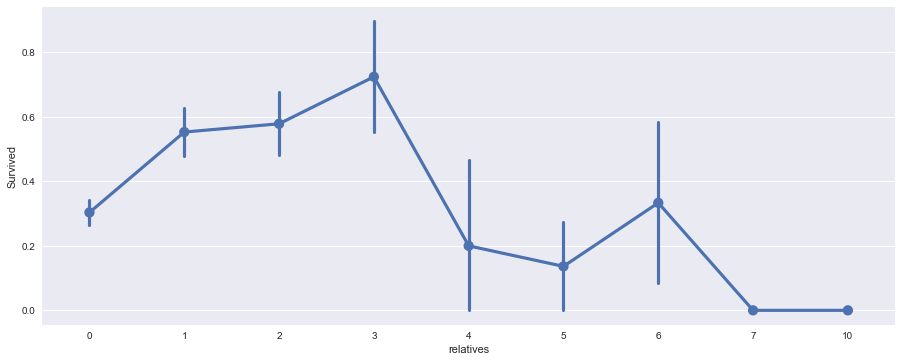

In [99]:
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

## Building Machine Learning Models

In [100]:
X_train = train[columns2]
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

#### Stochastic Gradient Descent (SGD):

In [101]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(test_X)

sgd.score(train_X, train_y)

acc_sgd = round(sgd.score(train_X, train_y) * 100, 2)

#### Random Forest:

In [102]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)

Y_prediction_rf = random_forest.predict(test_X)

random_forest.score(train_X, train_y)
acc_random_forest = round(random_forest.score(train_X, train_y) * 100, 2)


#### K Nearest Neighbor:

In [103]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)
Y_pred = knn.predict(test_X)
acc_knn = round(knn.score(train_X, train_y) * 100, 2)

#### Logistic Regression:

In [104]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

Y_pred = logreg.predict(test_X)

acc_log = round(logreg.score(train_X, train_y) * 100, 2)

#### Gaussian Naive Bayes:

In [105]:
gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
Y_pred = gaussian.predict(test_X)
acc_gaussian = round(gaussian.score(train_X, train_y) * 100, 2)

#### Perceptron:

In [106]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(train_X, train_y)

Y_pred = perceptron.predict(test_X)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

#### Linear Support Vector Machine:

In [107]:
linear_svc = LinearSVC()
linear_svc.fit(train_X, train_y)

Y_pred = linear_svc.predict(test_X)

acc_linear_svc = round(linear_svc.score(train_X, train_y) * 100, 2)

#### Decision Tree

In [108]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
Y_pred = decision_tree.predict(test_X)
acc_decision_tree = round(decision_tree.score(train_X, train_y) * 100, 2)

### Which is the best Model ?

In [109]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                            
93.54               Random Forest
93.54               Decision Tree
85.67                         KNN
81.46         Logistic Regression
80.62     Support Vector Machines
78.37                 Naive Bayes
71.77  Stochastic Gradient Decent
67.34                  Perceptron

As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

### K-Fold Cross Validation:
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.
The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [110]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, train_X, train_y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.77777778 0.78873239 0.8028169  0.81690141 0.74647887
 0.76056338 0.76056338 0.81690141 0.77464789]
Mean: 0.7823161189358372
Standard Deviation: 0.022769280814388823


This means in our case that the accuracy of our model can differ + — 2%.
I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

### Let's have a look at the feature importance

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [111]:
importances = pd.DataFrame({'feature':train_X.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

importance
feature                               
Fare                             0.393
Sex_male                         0.182
Sex_female                       0.146
Pclass_3                         0.062
Age_categories_Infant            0.040
Pclass_1                         0.028
Age_categories_Missing           0.020
Pclass_2                         0.019
Age_categories_Young Adult       0.019
Age_categories_Child             0.017
Embarked_S                       0.017
Age_categories_Adult             0.015
Embarked_C                       0.014
Embarked_Q                       0.013
Age_categories_Teenager          0.010

<AxesSubplot:xlabel='feature'>

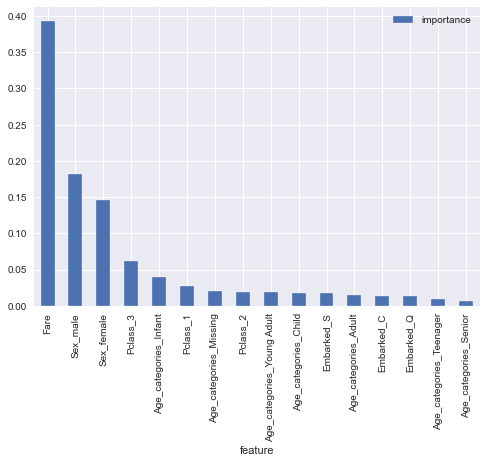

In [112]:
importances.plot.bar()

Conclusion:
age_cat_senionr and teenager doesn’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. 

##### Submission

In [113]:
"""holdout_predictions = random_forest.predict(holdout[columns2])
holdout_predictions"""

'holdout_predictions = random_forest.predict(holdout[columns2])\nholdout_predictions'

In [114]:
""" holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('titanic_submission_3.csv', index=False)"""

' holdout_ids = holdout["PassengerId"]\nsubmission_df = {"PassengerId": holdout_ids,\n                 "Survived": holdout_predictions}\nsubmission = pd.DataFrame(submission_df)\n\nsubmission.to_csv(\'titanic_submission_3.csv\', index=False)'